### Classification with KNN algorithm

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import Counter

In [2]:
# Load a CSV file
vstable = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/Video_Store_2.csv", index_col = 0)
vstable.head(5)

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
1,M,45000,25,32,2.5,Action,Yes
2,F,54000,33,12,3.4,Drama,No
3,F,32000,20,42,1.6,Comedy,No
4,F,59000,70,16,4.2,Drama,Yes
5,M,37000,35,25,3.2,Action,Yes


In [3]:
# Randomly permute the index
random.seed(37)
vs = vstable.reindex(np.random.permutation(vstable.index))
vs.head(10)

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
17,M,36000,35,28,3.5,Drama,Yes
18,F,6000,16,39,1.8,Action,Yes
21,F,47000,52,11,3.1,Drama,No
35,M,74000,29,43,4.6,Action,Yes
8,M,74000,25,31,2.4,Action,Yes
34,F,29000,32,19,2.9,Action,Yes
48,F,52000,47,14,1.6,Drama,No
2,F,54000,33,12,3.4,Drama,No
38,M,41000,38,20,3.3,Drama,Yes


In [4]:
# Extract the target variable
vs_target = vs['Incidentals']
vs_target.head(5)

Cust ID
17    Yes
18    Yes
21     No
35    Yes
8     Yes
Name: Incidentals, dtype: object

In [5]:
# Create dummy variables
vs = pd.get_dummies(vs[['Gender','Income','Age','Rentals','Avg Per Visit','Genre']], dtype = 'int')
vs.head(10)

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
17,36000,35,28,3.5,0,1,0,0,1
18,6000,16,39,1.8,1,0,1,0,0
21,47000,52,11,3.1,1,0,0,0,1
35,74000,29,43,4.6,0,1,1,0,0
8,74000,25,31,2.4,0,1,1,0,0
34,29000,32,19,2.9,1,0,1,0,0
48,52000,47,14,1.6,1,0,0,0,1
2,54000,33,12,3.4,1,0,0,0,1
38,41000,38,20,3.3,0,1,0,0,1


In [6]:
# Split the DataFrame into training and testing sets
size = int(0.8 * len(vs))
vs_train = vs[:size]
vs_test = vs[size:]
print("Train Set:")
print(vs_train.head(5))
print("\n")
print("Test Set:")
print(vs_test.head(5))

Train Set:
         Income  Age  Rentals  Avg Per Visit  Gender_F  Gender_M  \
Cust ID                                                            
17        36000   35       28            3.5         0         1   
18         6000   16       39            1.8         1         0   
21        47000   52       11            3.1         1         0   
35        74000   29       43            4.6         0         1   
8         74000   25       31            2.4         0         1   

         Genre_Action  Genre_Comedy  Genre_Drama  
Cust ID                                           
17                  0             0            1  
18                  1             0            0  
21                  0             0            1  
35                  1             0            0  
8                   1             0            0  


Test Set:
         Income  Age  Rentals  Avg Per Visit  Gender_F  Gender_M  \
Cust ID                                                            
10     

In [7]:
# Split the target variable into training and testing sets
vs_target_train = vs_target[0:int(size)]
vs_target_test = vs_target[int(size):len(vs)]
print("Train Target:")
print(vs_target_train.head(5))
print("\n")
print("Test Target:")
print(vs_target_test.head(5))

Train Target:
Cust ID
17    Yes
18    Yes
21     No
35    Yes
8     Yes
Name: Incidentals, dtype: object


Test Target:
Cust ID
10     No
11    Yes
27     No
20    Yes
12    Yes
Name: Incidentals, dtype: object


In [8]:
# Normalization
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(vs_train) # Fit the scaler to the training data
vs_train_norm = min_max_scaler.transform(vs_train) # Transform training data with the scaler
vs_test_norm = min_max_scaler.transform(vs_test) # Transform test data with the scaler
print("Normalized Train Data:")
print(vs_train_norm[:5])
print("\n")
print("Normalized Test Data:")
print(vs_test_norm[:5])

Normalized Train Data:
[[0.39772727 0.36363636 0.48717949 0.66666667 0.         1.
  0.         0.         1.        ]
 [0.05681818 0.01818182 0.76923077 0.19444444 1.         0.
  1.         0.         0.        ]
 [0.52272727 0.67272727 0.05128205 0.55555556 1.         0.
  0.         0.         1.        ]
 [0.82954545 0.25454545 0.87179487 0.97222222 0.         1.
  1.         0.         0.        ]
 [0.82954545 0.18181818 0.56410256 0.36111111 0.         1.
  1.         0.         0.        ]]


Normalized Test Data:
[[0.72727273 0.45454545 0.30769231 0.61111111 1.         0.
  0.         0.         1.        ]
 [0.45454545 0.12727273 1.         0.33333333 1.         0.
  0.         0.         1.        ]
 [0.69318182 0.58181818 0.58974359 0.69444444 1.         0.
  0.         0.         1.        ]
 [0.125      0.01818182 0.35897436 0.30555556 0.         1.
  1.         0.         0.        ]
 [0.28409091 0.12727273 0.58974359 0.5        1.         0.
  1.         0.         0.  

In [9]:
# Convert to NumPy arrays
vs_target_train = np.array(vs_target_train)
vs_target_test = np.array(vs_target_test)
print("Train Target:")
print(vs_target_train)
print("\n")
print("Test Target:")
print(vs_target_test)

Train Target:
['Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No'
 'Yes']


Test Target:
['No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes']


In [10]:
def knn_search(x, D, K, measure):

    """
    Find K nearest neighbors of an instance x among the instances in D.
     
    Parameters:
    x : array-like
        The instance for which one wants to find neighbors.
    D : array-like
        The dataset containing instances to search through.
    K : int
        The number of nearest neighbors to return.
    measure : int
        Distance measure to use (0 for Euclidean Distance, 1 for Cosine Similarity).
          
    Returns:
    tuple:
        A tuple containing the indices of the K nearest neighbors and their distances.         
    """
    
    if measure == 0: 
        dists = np.sqrt(((D - x) ** 2).sum(axis = 1)) # Calculate Euclidean Distances

    elif measure == 1: 
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))]) # Compute the norms of each instance in D
        x_norm = np.linalg.norm(x) # Compute the norm of the instance x
        sims = np.dot(D, x) / (D_norm * x_norm) # Calculate Cosine Similarity
        dists = 1 - sims # Convert cosine similarity to distance
    
    # Get the indices of the sorted distances
    idx = np.argsort(dists)

    return idx[:K], dists

In [11]:
# Finding the k = 5 nearest neighbors using Euclidean Distance
neigh_idx, distances = knn_search(vs_test_norm[0], vs_train_norm, 5, 0)
print("\n")
print(neigh_idx)
vs_train.iloc[neigh_idx]



[18  7  2 27  6]


,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
47,69000,35,22,2.8,1,0,0,0,1
2,54000,33,12,3.4,1,0,0,0,1
21,47000,52,11,3.1,1,0,0,0,1
7,29000,45,19,3.8,1,0,0,0,1
48,52000,47,14,1.6,1,0,0,0,1


In [12]:
print(distances[neigh_idx]) # Display the distances of the K nearest neighbors
print("\n")
neigh_labels = vs_target_train[neigh_idx] # Extract the labels of the nearest neighbors
print(neigh_labels)
print("\n")
print(Counter(neigh_labels)) # Display the count of each label
print("\n")
print(Counter(neigh_labels).most_common(1)) # Print the most common label and its occurrence

[0.17400622 0.29300067 0.39783764 0.4444545  0.54150824]


['Yes' 'No' 'No' 'No' 'No']


Counter({'No': 4, 'Yes': 1})


[('No', 4)]


In [13]:
def knn_classify(x, D, K, labels, measure):
    
    neigh_idx, distances = knn_search(x, D, K, measure) # Find the indices and distances of the K nearest neighbors
    neigh_labels = labels[neigh_idx] # Get the labels of the nearest neighbors
    count = Counter(neigh_labels) # Count occurrences of each label among the neighbors
    
    print("Labels for top", K, "neighbors:", count.most_common())
    
    return count.most_common(1)[0][0]

In [14]:
errorCount = 0.0
number_of_test_vectors = len(vs_target_test)

for i in range(number_of_test_vectors):
    classifier_result = knn_classify(vs_test_norm[i, :], vs_train_norm, 5, vs_target_train, 0)
    print("Predicted Label:", classifier_result, "==> Actual Label:", vs_target_test[i])
    print()

    if (classifier_result != vs_target_test[i]):
          errorCount += 1.0
        
print("Classification Accuracy:", 1 - (errorCount / float(number_of_test_vectors)))

Labels for top 5 neighbors: [('No', 4), ('Yes', 1)]
Predicted Label: No ==> Actual Label: No

Labels for top 5 neighbors: [('No', 3), ('Yes', 2)]
Predicted Label: No ==> Actual Label: Yes

Labels for top 5 neighbors: [('No', 3), ('Yes', 2)]
Predicted Label: No ==> Actual Label: No

Labels for top 5 neighbors: [('No', 3), ('Yes', 2)]
Predicted Label: No ==> Actual Label: Yes

Labels for top 5 neighbors: [('Yes', 4), ('No', 1)]
Predicted Label: Yes ==> Actual Label: Yes

Labels for top 5 neighbors: [('Yes', 3), ('No', 2)]
Predicted Label: Yes ==> Actual Label: Yes

Labels for top 5 neighbors: [('No', 3), ('Yes', 2)]
Predicted Label: No ==> Actual Label: Yes

Labels for top 5 neighbors: [('No', 5)]
Predicted Label: No ==> Actual Label: No

Labels for top 5 neighbors: [('No', 4), ('Yes', 1)]
Predicted Label: No ==> Actual Label: Yes

Labels for top 5 neighbors: [('Yes', 4), ('No', 1)]
Predicted Label: Yes ==> Actual Label: Yes

Classification Accuracy: 0.6


In [15]:
def knn_classify(x, D, K, labels, measure):

    neigh_idx, distances = knn_search(x, D, K, measure) # Find the indices and distances of the K nearest neighbors
    neigh_labels = labels[neigh_idx] # Get the labels of the nearest neighbors
    count = Counter(neigh_labels) # Count occurrences of each label among the neighbors
    predicted_label = count.most_common(1)[0][0] # Get the most common label

    return neigh_idx, predicted_label

In [16]:
def knn_evaluate(test, test_labs, train, train_labs, K, measure):
    
    """
    Evaluate the KNN classifier on a given test dataset.
     
    Parameters:
    test : array-like
        The test dataset to evaluate.
    test_labs : array-like
        The actual labels for the test dataset.
    train : array-like
        The training dataset used for classification.
    train_labs : array-like
        The labels for the training dataset.
    K : int
        The number of nearest neighbors to return.
    measure : int
        Distance measure to use (0 for Euclidean Distance, 1 for Cosine Similarity).

          
    Returns:
    float:
        The classification accuracy.         
    """

    T = 0  # Number of correctly classified instances
    F = 0  # Number of incorrectly classified instances

    for i in range(len(test)):
        actual = test_labs[i] # Get the actual label for the current test instance
        top_K_neighbors, predicted = knn_classify(test[i], train, K, train_labs, measure) # Classify using KNN
        
        # Check if the predicted label matches the actual label
        if actual == predicted:
            T += 1       
        else:
            F += 1
    # Calculate accuracy 
    accuracy = float(T) / float(T + F) 

    return accuracy

In [17]:
# Evaluate the KNN classifier and calculate accuracy on the training and testing dataset
accuracy = knn_evaluate(vs_test_norm, vs_target_test, vs_train_norm, vs_target_train, 5, 0) # With Euclidean Distance
print("Classification Accuracy:", accuracy)

Classification Accuracy: 0.6


In [18]:
# Evaluate the KNN classifier and calculate accuracy on the training dataset
accuracy = knn_evaluate(vs_train_norm, vs_target_train, vs_train_norm, vs_target_train, 5, 0) # With Euclidean Distance
print("Classification Accuracy (Train):", accuracy)

Classification Accuracy (Train): 0.775


In [19]:
# Evaluate the KNN classifier and calculate accuracy on the training and testing dataset
accuracy = knn_evaluate(vs_test_norm, vs_target_test, vs_train_norm, vs_target_train, 5, 1) # With Cosine Similarity
print("Classification Accuracy:", accuracy)

Classification Accuracy: 0.5


In [20]:
Euclid = []

# Evaluate the KNN classifier for K values ranging from 1 to 39
for K in range(1, 40):
    Euclid.append(knn_evaluate(vs_test_norm, vs_target_test, vs_train_norm, vs_target_train, K, 0))

print(Euclid)

[0.7, 0.7, 0.5, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.8, 0.7, 0.8, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.6, 0.7, 0.7, 0.6, 0.5, 0.5, 0.5, 0.5, 0.3]


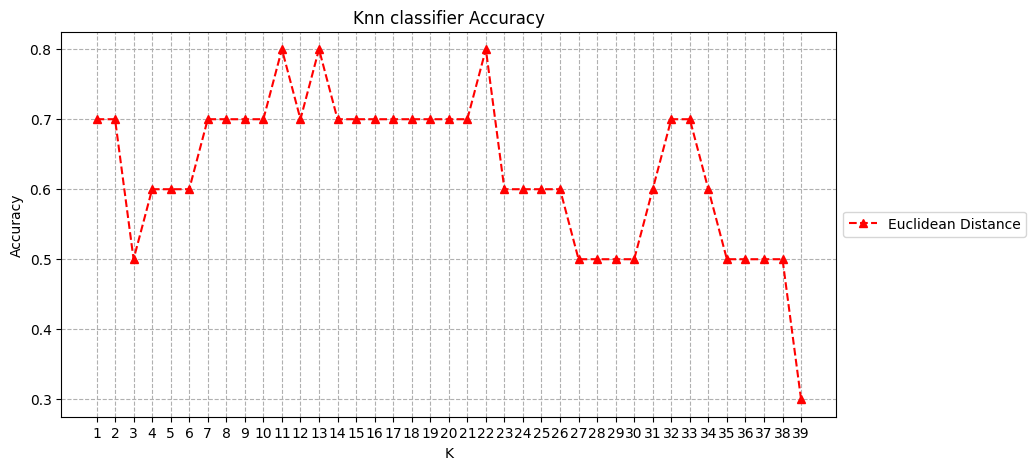

In [21]:
# Plot the accuracy against K values
Ks = list(range(1, 40))
plt.figure(figsize = (10,5))
plt.plot(Ks, Euclid, 'r^--', label = 'Euclidean Distance')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy')
plt.grid(linestyle = '--')
plt.xticks(Ks)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()